# 偏最小平方奇異值分解(Partial Least Square Singular Vectors Decomposition)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Training Data

In [2]:
N=3000
CLASS=2
d=6
t=6
X=np.zeros((N,d))
Y=np.zeros((N,t))
base=random.normal(loc=1, scale=10, size=N)
for i in range(0,d):
    X[:,i]=12*np.sin(base)**(i+1)+random.rand(N)
for i in range(0,t):
    Y[:,i]=12*np.cos(base)**(i+1)+random.rand(N)

# Plot Distribition

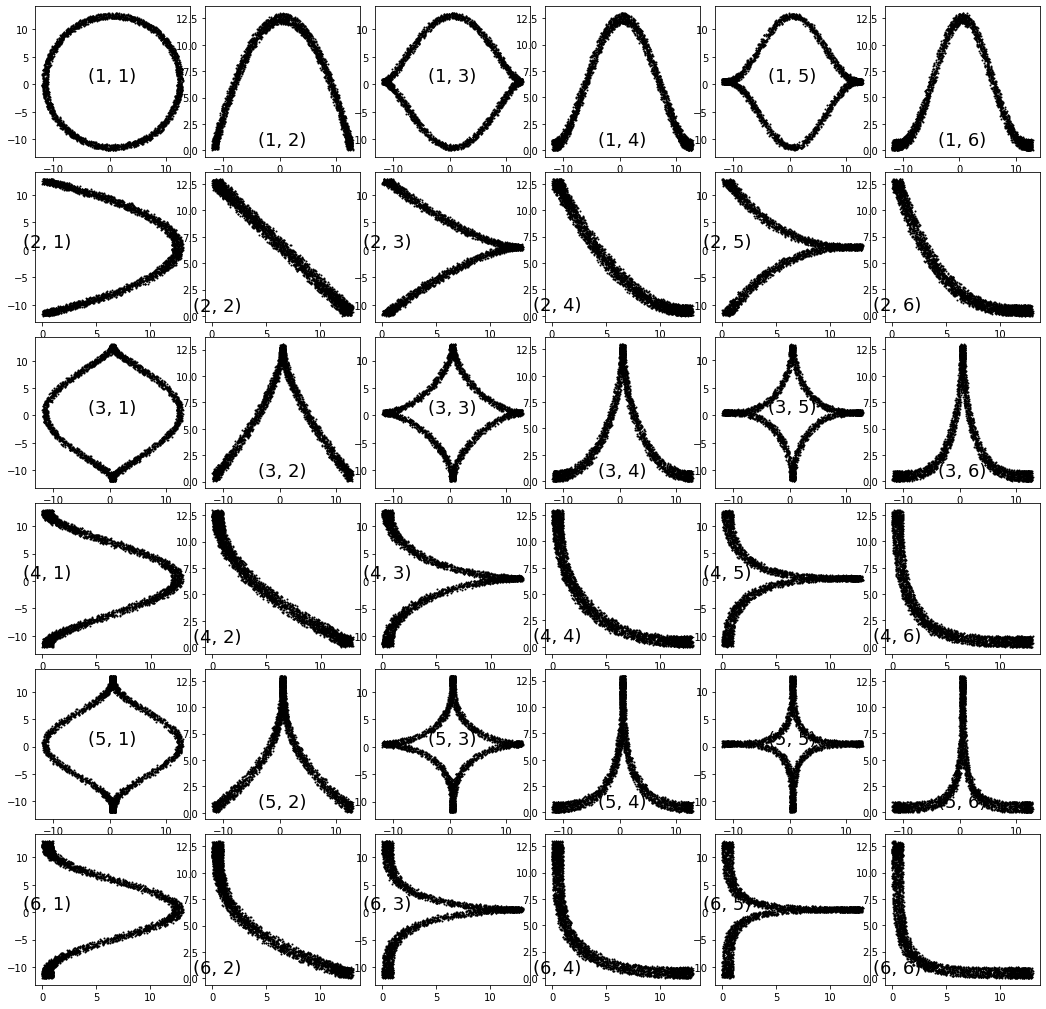

In [3]:
plt.rcParams["figure.figsize"] = (18,18)
fig , ax = plt.subplots()
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1,d+1):
    for j in range(1,t+1):
        plt.subplot(d, t, (i-1)*t+j)
        plt.plot(X[:,i-1],Y[:,j-1],"ko",markersize=1)
        plt.text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
plt.show()

# PLS-SVD

In [4]:
T=3
XI=np.zeros((N,T))
OMEGA=np.zeros((N,T))
GAMMA=np.zeros((d,T))
DELTA=np.zeros((t,T))
UU=np.zeros((d,T))
VV=np.zeros((t,T))
CCM=np.dot(X.T,Y)
U, S, V = np.linalg.svd(CCM)
UU=U[:,:T]
VV=V[:T,:].T
XI=np.dot(X,UU)
OMEGA=np.dot(Y,VV)
GAMMA=np.dot(np.dot(np.linalg.inv(np.dot(XI.T,XI)),XI.T),X).T
DELTA=np.dot(np.dot(np.linalg.inv(np.dot(OMEGA.T,OMEGA)),OMEGA.T),Y).T

# Plot Result

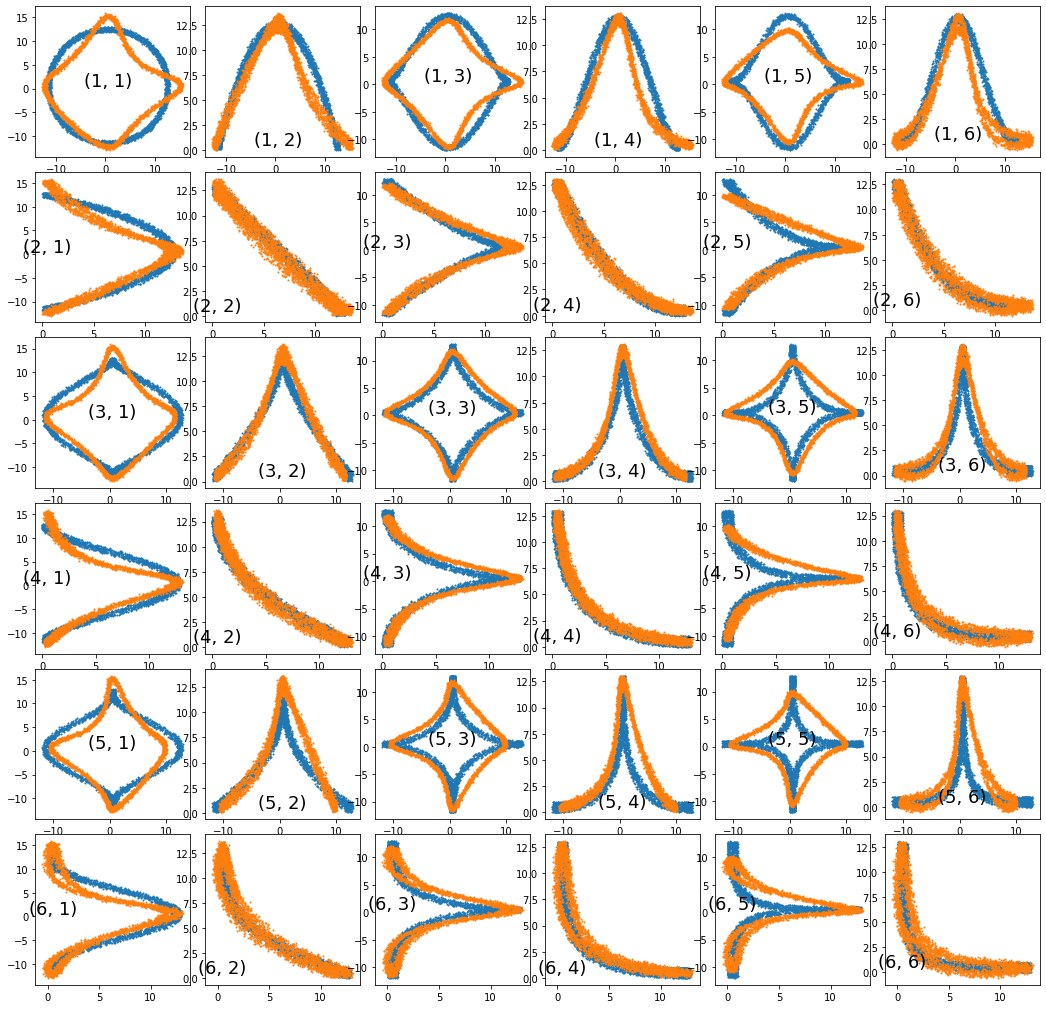

In [5]:
plt.rcParams["figure.figsize"] = (18,18)
TRAIN="Training Data"
TEST="Testing Data"
X_fit=np.dot(XI,GAMMA.T)
Y_fit=np.dot(OMEGA,DELTA.T)
SIZE=3
fig , ax = plt.subplots()
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1,d+1):
    for j in range(1,t+1):
        plt.subplot(d, t, (i-1)*t+j)
        plt.plot(X[:,i-1],Y[:,j-1],"o",markersize=1)
        plt.plot(X_fit[:,i-1],Y_fit[:,j-1],"o",markersize=1)
        plt.text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
plt.show()